In [1]:
import pandas as pd

DB_URL = 'onad.cbjjamtlar2t.ap-northeast-2.rds.amazonaws.com'
DB_USER = 'onad'
DB_PASSWORD = 'rkdghktn12'
DB_DATABASE = 'onad'
DB_CHARSET = 'utf8mb4'
DB_LOGFLAG  = 'False'
DB_PORT = 3306

db_url = "mysql+pymysql://%s:%s@%s:%s/%s?charset=%s" % (
    DB_USER, DB_PASSWORD,
    DB_URL, DB_PORT,
    DB_DATABASE, DB_CHARSET
)

def data_from_sql_twitchchat(streamer, target_date):
    query = """
        select * from twitch_chat where streamer_name = "%s" and broad_date ="%s"
    """% (streamer, target_date)

    return pd.read_sql_query(query, db_url)

### 1 채팅데이터 로드

In [2]:
streamer = "rhdgurwns"
target_date = "2018-12-09"
df = data_from_sql_twitchchat(streamer, target_date)

In [3]:
chat_df = df.copy()
chat_df.head(2)

,chat_id,streamer_name,broad_date,chatterer,chat_time,chat_contents
0,5804896,rhdgurwns,2018-12-09,<명부러전 (worldbest29)>,08:02:31,공혁준 방송켜라
1,5804897,rhdgurwns,2018-12-09,<명부러전 (worldbest29)>,08:02:39,방송켜 뽀뽀 쪽


In [4]:
chat_df.shape

(57597, 6)

### 2 시간 인덱스로 변환

In [5]:
# "얍하" 를 기준으로 시작시간 설정
# start_time = chat_df[chat_df.chat_contents == "혁하"]["chat_time"].values[5]
# start_time = target_date + " " + start_time
# start_time = pd.to_datetime(start_time)

In [6]:
chat_df[chat_df.chat_contents == "혁하"].head()

,chat_id,streamer_name,broad_date,chatterer,chat_time,chat_contents
41,5804937,rhdgurwns,2018-12-09,<$고니구니 (itn1027)>,13:25:08,혁하
57,5804953,rhdgurwns,2018-12-09,<sanha0510>,13:25:26,혁하
71,5804967,rhdgurwns,2018-12-09,<바비노 (lowe3100)>,13:25:36,혁하
79,5804975,rhdgurwns,2018-12-09,<%친애하는강현님께 (wls4429)>,13:25:42,혁하
81,5804977,rhdgurwns,2018-12-09,<jinkyo1117>,13:25:45,혁하


In [7]:
chat_df['stream_time'] = chat_df['chat_time'].apply(lambda x : target_date + " " + x)
# chat_df['stream_time'] = chat_df['stream_time'].apply(lambda x : pd.to_datetime(x) - start_time)
chat_df.index = pd.to_datetime(chat_df['stream_time'])
# chat_df.set_index("stream_time", inplace=True)

In [8]:
# chat_df = chat_df[chat_df.index > "00:00:00"]

In [9]:
chat_df.head()

,chat_id,streamer_name,broad_date,chatterer,chat_time,chat_contents,stream_time
stream_time,,,,,,,
2018-12-09 08:02:31,5804896,rhdgurwns,2018-12-09,<명부러전 (worldbest29)>,08:02:31,공혁준 방송켜라,2018-12-09 08:02:31
2018-12-09 08:02:39,5804897,rhdgurwns,2018-12-09,<명부러전 (worldbest29)>,08:02:39,방송켜 뽀뽀 쪽,2018-12-09 08:02:39
2018-12-09 09:12:19,5804898,rhdgurwns,2018-12-09,<럼주 (geonw90)>,09:12:19,오뱅없?,2018-12-09 09:12:19
2018-12-09 09:18:23,5804899,rhdgurwns,2018-12-09,<@%rhdqurwns1>,09:18:23,없을수도,2018-12-09 09:18:23
2018-12-09 09:18:34,5804900,rhdgurwns,2018-12-09,<@%rhdqurwns1>,09:18:34,방송에서 자세히 말을안하니까..,2018-12-09 09:18:34


### 3 분석데이터셋으로 전처리

#### 3-1 분석 데이터셋 만들기

In [10]:
anal_df = chat_df.pivot_table(index=chat_df.index, values='chatterer', aggfunc=len).loc[:, ['chatterer']]

#### 3-2 변수 추가

In [11]:
word_list = ['ㅋ', '유하', '꿀잼', '?', 'ㄵ', '노잼', 'ㄴㅈ', '혁준',]

for word in word_list:
    target_word = "cnt_" + word
    chat_df[target_word] =  chat_df.chat_contents.apply(lambda x : x.count(word))
    anal_df[target_word] = chat_df.pivot_table(index=chat_df.index, values=target_word, aggfunc=sum).loc[:, target_word]

anal_df['cnt_ㅋ'].unique()

array([  0,   8,  13,   7,   5,   3,  14,   6,   4,   2,  11,  15,  25,
        20,  29,  19,  36,  12,  10,   1,  18,  30,  27,  23,  21,   9,
        39,  17,  28,  22,  24,  31,  32,  16,  26,  38,  40,  33,  37,
        35,  58,  81,  43,  55,  44,  47,  52,  54,  41,  68, 131,  78,
        34,  88,  80,  53,  60,  45,  57,  46,  49,  50,  62,  42,  82,
       112,  64, 106,  48,  92, 264, 140, 113, 168,  86, 109,  72,  74,
       191,  65,  63,  66, 167, 125, 156,  61, 132,  95,  90,  56,  69,
        85, 119,  93, 124, 108, 102,  77,  73, 346, 208, 216,  59, 103,
       139, 115, 157,  99,  84, 104, 218, 114, 117,  79, 100,  51, 154,
       160, 174, 101, 195, 192, 198, 107, 110,  97,  71, 122, 158, 419,
       380,  91, 166,  87,  98,  75, 196,  83, 128,  89, 150,  70,  67,
       194, 189, 249, 161, 193, 277, 126, 143, 141,  94, 120, 123, 111,
       250, 130, 303, 179, 145, 153, 142, 136, 121, 134, 144, 201, 137,
        76, 185, 116, 186,  96, 151, 227, 138, 172, 149, 184, 26

In [12]:
import numpy as np
anal_df[anal_df['chatterer'] > np.percentile(anal_df.chatterer.unique(), 60)]

,chatterer,cnt_ㅋ,cnt_유하,cnt_꿀잼,cnt_?,cnt_ㄵ,cnt_노잼,cnt_ㄴㅈ,cnt_혁준
stream_time,,,,,,,,,
2018-12-09 17:19:03,29,126,0,0,25,0,0,0,0
2018-12-09 17:33:35,33,303,0,0,0,0,0,0,0
2018-12-09 18:32:34,26,311,0,0,17,0,0,0,0
2018-12-09 18:32:40,35,38,0,0,0,0,0,0,0
2018-12-09 18:32:43,52,29,0,0,2,0,0,0,0
2018-12-09 18:32:46,47,24,0,0,2,0,0,0,0
2018-12-09 18:32:49,49,13,0,0,0,0,0,0,0
2018-12-09 18:32:52,49,5,0,0,2,0,0,0,22
2018-12-09 18:32:55,40,0,0,0,0,0,0,0,1


In [13]:
anal_df[anal_df['chatterer'] > np.percentile(anal_df.chatterer, 99.9)]

,chatterer,cnt_ㅋ,cnt_유하,cnt_꿀잼,cnt_?,cnt_ㄵ,cnt_노잼,cnt_ㄴㅈ,cnt_혁준
stream_time,,,,,,,,,
2018-12-09 18:32:40,35,38,0,0,0,0,0,0,0
2018-12-09 18:32:43,52,29,0,0,2,0,0,0,0
2018-12-09 18:32:46,47,24,0,0,2,0,0,0,0
2018-12-09 18:32:49,49,13,0,0,0,0,0,0,0
2018-12-09 18:32:52,49,5,0,0,2,0,0,0,22
2018-12-09 18:32:55,40,0,0,0,0,0,0,0,1
2018-12-09 18:32:59,36,0,0,0,0,0,0,0,0
2018-12-09 18:33:02,36,0,0,0,0,0,0,0,0
2018-12-09 18:33:05,37,0,0,0,0,0,0,0,0


In [14]:
anal_df[anal_df['cnt_ㅋ'] > np.percentile(anal_df['cnt_ㅋ'], 99.9)]

,chatterer,cnt_ㅋ,cnt_유하,cnt_꿀잼,cnt_?,cnt_ㄵ,cnt_노잼,cnt_ㄴㅈ,cnt_혁준
stream_time,,,,,,,,,
2018-12-09 14:51:26,11,264,0,0,0,0,0,0,0
2018-12-09 16:34:12,23,346,0,0,0,0,0,0,0
2018-12-09 16:34:15,14,208,0,0,0,0,0,0,0
2018-12-09 16:34:16,16,216,0,0,0,0,0,0,0
2018-12-09 16:46:00,14,218,0,0,0,0,0,0,0
2018-12-09 16:52:09,15,198,0,0,1,0,0,0,0
2018-12-09 16:56:44,23,419,0,0,0,0,0,0,0
2018-12-09 16:56:45,25,380,0,0,0,0,0,0,0
2018-12-09 17:03:19,14,196,0,0,0,0,0,0,10


In [15]:
anal_df['validation'] = anal_df['chatterer'] + anal_df['cnt_ㅋ']
anal_df['validation+?'] = anal_df['chatterer'] + anal_df['cnt_ㅋ'] + anal_df['cnt_?']

In [16]:
anal_df[anal_df['validation'] > np.percentile(anal_df.validation, 99.9)].head(2)

,chatterer,cnt_ㅋ,cnt_유하,cnt_꿀잼,cnt_?,cnt_ㄵ,cnt_노잼,cnt_ㄴㅈ,cnt_혁준,validation,validation+?
stream_time,,,,,,,,,,,
2018-12-09 14:51:26,11,264,0,0,0,0,0,0,0,275,275
2018-12-09 16:34:12,23,346,0,0,0,0,0,0,0,369,369


In [17]:
anal_df[anal_df['validation+?'] > np.percentile(anal_df.validation, 99.99)]

,chatterer,cnt_ㅋ,cnt_유하,cnt_꿀잼,cnt_?,cnt_ㄵ,cnt_노잼,cnt_ㄴㅈ,cnt_혁준,validation,validation+?
stream_time,,,,,,,,,,,
2018-12-09 16:56:44,23,419,0,0,0,0,0,0,0,442,442
2018-12-09 16:56:45,25,380,0,0,0,0,0,0,0,405,405


In [18]:
anal_df.shape

(16038, 11)

In [19]:
anal_df.head(2)

,chatterer,cnt_ㅋ,cnt_유하,cnt_꿀잼,cnt_?,cnt_ㄵ,cnt_노잼,cnt_ㄴㅈ,cnt_혁준,validation,validation+?
stream_time,,,,,,,,,,,
2018-12-09 08:02:31,1,0,0,0,0,0,0,0,1,1,1
2018-12-09 08:02:39,1,0,0,0,0,0,0,0,0,1,1


In [20]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
a = pd.DataFrame(sc.fit_transform(anal_df), index=anal_df.index, columns=anal_df.columns)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [21]:
a['validation'] = a['chatterer'] + a['cnt_ㅋ']
a['validation+?'] = a['chatterer'] + a['cnt_ㅋ'] + a['cnt_?']
spot = a[a['validation'] > np.percentile(a['validation'], 95)]
spot

,chatterer,cnt_ㅋ,cnt_유하,cnt_꿀잼,cnt_?,cnt_ㄵ,cnt_노잼,cnt_ㄴㅈ,cnt_혁준,validation,validation+?
stream_time,,,,,,,,,,,
2018-12-09 14:01:18,0.176471,0.095465,0.0,0.0,0.057692,0.0,0.0,0.0,0.000000,0.271936,0.329628
2018-12-09 14:04:15,0.215686,0.040573,0.0,0.0,0.519231,0.0,0.0,0.0,0.000000,0.256259,0.775490
2018-12-09 14:09:52,0.196078,0.093079,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.289157,0.289157
2018-12-09 14:09:56,0.117647,0.193317,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.310964,0.310964
2018-12-09 14:09:57,0.156863,0.102625,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.259488,0.259488
2018-12-09 14:20:52,0.254902,0.007160,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.262062,0.262062
2018-12-09 14:21:13,0.196078,0.064439,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.260518,0.260518
2018-12-09 14:23:10,0.274510,0.124105,0.0,0.0,0.307692,0.0,0.0,0.0,0.018868,0.398615,0.706307
2018-12-09 14:23:12,0.254902,0.128878,0.0,0.0,0.038462,0.0,0.0,0.0,0.000000,0.383780,0.422242


In [22]:
a['label'] = a['validation'].apply(lambda x : 1 if x in spot.validation.values else 0)

In [23]:
yes_data = a[a['label'] == 1]
no_data = a[a['label'] == 0]

In [24]:
yes_data

,chatterer,cnt_ㅋ,cnt_유하,cnt_꿀잼,cnt_?,cnt_ㄵ,cnt_노잼,cnt_ㄴㅈ,cnt_혁준,validation,validation+?,label
stream_time,,,,,,,,,,,,
2018-12-09 14:01:18,0.176471,0.095465,0.0,0.0,0.057692,0.0,0.0,0.0,0.000000,0.271936,0.329628,1
2018-12-09 14:04:15,0.215686,0.040573,0.0,0.0,0.519231,0.0,0.0,0.0,0.000000,0.256259,0.775490,1
2018-12-09 14:09:52,0.196078,0.093079,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.289157,0.289157,1
2018-12-09 14:09:56,0.117647,0.193317,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.310964,0.310964,1
2018-12-09 14:09:57,0.156863,0.102625,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.259488,0.259488,1
2018-12-09 14:20:52,0.254902,0.007160,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.262062,0.262062,1
2018-12-09 14:21:13,0.196078,0.064439,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.260518,0.260518,1
2018-12-09 14:23:10,0.274510,0.124105,0.0,0.0,0.307692,0.0,0.0,0.0,0.018868,0.398615,0.706307,1
2018-12-09 14:23:12,0.254902,0.128878,0.0,0.0,0.038462,0.0,0.0,0.0,0.000000,0.383780,0.422242,1


In [31]:
a.head()

,chatterer,cnt_ㅋ,cnt_유하,cnt_꿀잼,cnt_?,cnt_ㄵ,cnt_노잼,cnt_ㄴㅈ,cnt_혁준,validation,validation+?,label
stream_time,,,,,,,,,,,,
2018-12-09 08:02:31,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.018868,0.0,0.000000,0
2018-12-09 08:02:39,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0
2018-12-09 09:12:19,0.0,0.0,0.0,0.0,0.019231,0.0,0.0,0.0,0.000000,0.0,0.019231,0
2018-12-09 09:18:23,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0
2018-12-09 09:18:34,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0


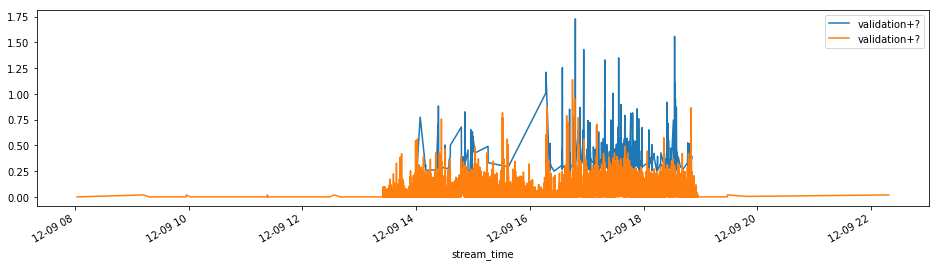

In [41]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,4))
yes_data['validation+?'].plot(x=a.index, kind='line')
no_data['validation+?'].plot(x=a.index, kind='line')
plt.legend()
plt.show()

In [40]:
yes_data.plot(x=yes_data.index, kind='scatter')

ValueError: scatter requires an x and y column

In [ ]:
a.plot(kind='bar')
plt.show()

In [ ]:
point = anal_df[anal_df['validation+?'] > np.percentile(anal_df.validation, 99.99)]

In [ ]:
point['time'] = point.index
point['time'].apply(lambda x : 

In [ ]:
point_section_minus = point.index - pd.Timedelta("30s")
point_section_plus = point.index + pd.Timedelta("30s")

point_section_minus, point_section_plus

In [ ]:
section = []
for _ in point.index:
    section.extend(pd.date_range(point_section_minus, point_section_plus, freq='s'))
section